# Análise exploratória dos dados

## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from ipywidgets import *
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
sns.set()

# Fontes de dados

In [1]:
#!wget https://codenation-challenges.s3-us-west-1.amazonaws.com/ml-leads/estaticos_market.csv.zip
#!unzip estaticos_market.csv.zip
#!wget https://codenation-challenges.s3-us-west-1.amazonaws.com/ml-leads/estaticos_portfolio1.csv
#!wget https://codenation-challenges.s3-us-west-1.amazonaws.com/ml-leads/estaticos_portfolio2.csv
#!wget https://codenation-challenges.s3-us-west-1.amazonaws.com/ml-leads/estaticos_portfolio3.csv

In [2]:
#df_market = pd.read_csv('../data/estaticos_market.csv')
#df_market.drop(columns=['Unnamed: 0'], inplace=True)
#df_market.set_index('id', inplace=True)

df_market = pd.read_parquet('../data/estaticos_market.parquet')

# Descrição dos dados

Tirando uma amostra dos dados:

In [9]:
#df_market.set_index('id', inplace=True)
df_market.sample(5)

,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,dt_situacao,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_divisao,nm_segmento,fl_spa,fl_antt,fl_veiculo,vl_total_tancagem,vl_total_veiculos_antt,vl_total_veiculos_leves,vl_total_veiculos_pesados,fl_optante_simples,qt_art,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,vl_total_tancagem_grupo,vl_total_veiculos_antt_grupo,vl_potenc_cons_oleo_gas,fl_optante_simei,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,de_indicador_telefone,fl_simples_irregular,vl_frota,empsetorcensitariofaixarendapopulacao,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,qt_socios_st_suspensa,qt_socios_masculino,qt_socios_feminino,qt_socios_pep,qt_alteracao_socio_total,qt_alteracao_socio_90d,qt_alteracao_socio_180d,qt_alteracao_socio_365d,qt_socios_pj_ativos,qt_socios_pj_nulos,qt_socios_pj_baixados,qt_socios_pj_suspensos,qt_socios_pj_inaptos,vl_idade_media_socios_pj,vl_idade_maxima_socios_pj,vl_idade_minima_socios_pj,qt_coligados,qt_socios_coligados,qt_coligados_matriz,qt_coligados_ativo,qt_coligados_baixada,qt_coligados_inapta,qt_coligados_suspensa,qt_coligados_nula,idade_media_coligadas,idade_maxima_coligadas,idade_minima_coligadas,coligada_mais_nova_ativa,coligada_mais_antiga_ativa,idade_media_coligadas_ativas,coligada_mais_nova_baixada,coligada_mais_antiga_baixada,idade_media_coligadas_baixadas,qt_coligados_sa,qt_coligados_me,qt_coligados_mei,qt_coligados_ltda,qt_coligados_epp,qt_coligados_norte,qt_coligados_sul,qt_coligados_nordeste,qt_coligados_centro,qt_coligados_sudeste,qt_coligados_exterior,qt_ufs_coligados,qt_regioes_coligados,qt_ramos_coligados,qt_coligados_industria,qt_coligados_agropecuaria,qt_coligados_comercio,qt_coligados_serviço,qt_coligados_ccivil,qt_funcionarios_coligados,qt_funcionarios_coligados_gp,media_funcionarios_coligados_gp,max_funcionarios_coligados_gp,min_funcionarios_coligados_gp,vl_folha_coligados,media_vl_folha_coligados,max_vl_folha_coligados,min_vl_folha_coligados,vl_folha_coligados_gp,media_vl_folha_coligados_gp,max_vl_folha_coligados_gp,min_vl_folha_coligados_gp,faturamento_est_coligados,media_faturamento_est_coligados,max_faturamento_est_coligados,min_faturamento_est_coligados,faturamento_est_coligados_gp,media_faturamento_est_coligados_gp,max_faturamento_est_coligados_gp,min_faturamento_est_coligados_gp,total_filiais_coligados,media_filiais_coligados,max_filiais_coligados,min_filiais_coligados,qt_coligados_atividade_alto,qt_coligados_atividade_medio,qt_coligados_atividade_baixo,qt_coligados_atividade_mt_baixo,qt_coligados_atividade_inativo,qt_coligadas,sum_faturamento_estimado_coligadas,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_ex_funcionarios,qt_funcionarios_grupo,percent_func_genero_masc,percent_func_genero_fem,idade_ate_18,idade_de_19_a_23,idade_de_24_a_28,idade_de_29_a_33,idade_de_34_a_38,idade_de_39_a_43,idade_de_44_a_48,idade_de_49_a_53,idade_de_54_a_58,idade_acima_de_58,grau_instrucao_macro_analfabeto,grau_instrucao_macro_escolaridade_fundamental,grau_instrucao_macro_escolaridade_media,grau_instrucao_macro_escolaridade_superior,grau_instrucao_macro_desconhecido,total,meses_ultima_contratacaco,qt_admitidos_12meses,qt_desligados_12meses,qt_desligados,qt_admitidos,media_meses_servicos_all,max_meses_servicos_all,min_meses_servicos_all,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
9fcee718bd5626

As estatísticas descritivas:

In [14]:
descr = df_market.describe(include='all').round(2).T
descr['cv'] = descr['std']/(descr['mean']+.00001) # calcula o coef. de variação de Pearson

pct_miss = ((df_market.shape[0]-descr['count'])/df_market.shape[0])*100 # porcentagem de dados faltantes
descr['pct_missing'] = pct_miss
descr

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,cv,pct_missing
id,462298,462298,0a467be7f47071aad8d829e4bad28545bbe5af6534996c...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
fl_matriz,462298,2,True,433232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
de_natureza_juridica,462298,67,EMPRESARIO INDIVIDUAL,295756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
sg_uf,462298,6,MA,127654,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
natureza_juridica_macro,462298,7,OUTROS,320211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
de_ramo,462298,33,COMERCIO VAREJISTA,172404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
setor,460371,5,COMERCIO,211224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.416831
idade_empresa_anos,462298,NaN,NaN,NaN,9.95,9.62,0.02,2.76,6.7,14.47,106.43,0.966833,0
idade_emp_cat,462298,6,1 a 5,138580,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
fl_me,462298,2,False,461083,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


Os tipos de dados. Aqui, nota-se que a maioria dos tipos são numéricos, o que deve facilitar a parte de *feature engineering* mais adiante.

In [15]:
df_market.dtypes

id                                                object
fl_matriz                                           bool
de_natureza_juridica                              object
sg_uf                                             object
natureza_juridica_macro                           object
de_ramo                                           object
setor                                             object
idade_empresa_anos                               float64
idade_emp_cat                                     object
fl_me                                               bool
fl_sa                                               bool
fl_epp                                              bool
fl_mei                                              bool
fl_ltda                                             bool
dt_situacao                                       object
fl_st_especial                                      bool
fl_email                                            bool
fl_telefone                    

## Dados faltantes

Abaixo, a proporção de dados faltantes para o total, para todas as features. Percebe-se que em muitas features, mais da metade das observações são faltantes. Além disso, as correlações entre dados faltantes mais fortes presentes nos dados. A ocorrência de altas correlações indica que os dados faltantes partiram de um mesmo processo gerador dos dados. Isto é um problema pois quebra pressupostos de modelos de regressão linear.

In [10]:
df_market_na = df_market.isna()
df_market_na_corr = df_market_na.sample(frac=.1).corr()
df_market_na_corr.unstack().dropna().sort_values()

qt_socios_feminino      qt_socios_masculino              -0.216168
qt_socios_masculino     qt_socios_feminino               -0.216168
fl_optante_simei        qt_socios_st_regular             -0.134704
fl_optante_simples      qt_socios_st_regular             -0.134704
qt_socios_st_regular    fl_optante_simei                 -0.134704
                                                            ...   
qt_coligados_industria  qt_coligados_exterior             1.000000
                        qt_ufs_coligados                  1.000000
                        qt_regioes_coligados              1.000000
qt_ramos_coligados      qt_coligados_atividade_inativo    1.000000
tx_rotatividade         tx_rotatividade                   1.000000
Length: 24649, dtype: float64

Há um grande número de dados faltantes em torno das informações respectivas às quantidades de empresas coligadas e suas características. Para tanto, parece razoável preencher os dados faltantes com zero.

In [11]:
cols = df_market.columns[df_market.columns.str.contains('qt_coligados')]
df_market[cols] = df_market[cols].fillna(0)

A seguir, vamos remover as colunas com mais de 90% dos dados faltantes, a partir do entendimento que eles adicionam pouca informação em esforços futuros de modelagem.

In [16]:
df_market = df_market.loc[:,pct_miss<70]

O `DataFrame` após as transformações:

In [17]:
df_market.head()

,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,dt_situacao,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_divisao,nm_segmento,fl_spa,fl_antt,fl_veiculo,fl_optante_simples,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,fl_optante_simei,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,fl_simples_irregular,empsetorcensitariofaixarendapopulacao,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,qt_socios_masculino,qt_socios_feminino,qt_coligados,qt_coligados_matriz,qt_coligados_ativo,qt_coligados_baixada,qt_coligados_inapta,qt_coligados_suspensa,qt_coligados_nula,qt_coligados_sa,qt_coligados_me,qt_coligados_mei,qt_coligados_ltda,qt_coligados_epp,qt_coligados_norte,qt_coligados_sul,qt_coligados_nordeste,qt_coligados_centro,qt_coligados_sudeste,qt_coligados_exterior,qt_coligados_industria,qt_coligados_agropecuaria,qt_coligados_comercio,qt_coligados_serviço,qt_coligados_ccivil,qt_coligados_atividade_alto,qt_coligados_atividade_medio,qt_coligados_atividade_baixo,qt_coligados_atividade_mt_baixo,qt_coligados_atividade_inativo,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_filiais
0,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...,True,SOCIEDADE EMPRESARIA LIMITADA,RN,ENTIDADES EMPRESARIAIS,INDUSTRIA DA CONSTRUCAO,CONSTRUÇÃO CIVIL,14.457534,10 a 15,False,False,False,False,False,2005-03-25,False,True,True,SIM,CONSTRUCAO DE EDIFICIOS,CONSTRUCAO,False,False,False,True,0.0,0.0,False,RN,VERDE,ACIMA DE 1 ANO,23.0,ALTA,False,NaN,LESTE POTIGUAR,NATAL,True,2.0,2.0,0.0,44.0,47.0,41.0,2.0,2.0,NaN,6.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,"DE R$ 1.500.000,01 A R$ 4.800.000,00","DE R$ 1.500.000,01 A R$ 4.800.000,00",3132172.8,3132172.8,0
1,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c4...,True,EMPRESARIO INDIVIDUAL,PI,OUTROS,SERVICOS DE ALOJAMENTO/ALIMENTACAO,SERVIÇO,1.463014,1 a 5,False,False,False,True,False,2017-05-12,False,True,True,SIM,ALIMENTACAO,ALOJAMENTO E ALIMENTACAO,False,False,False,NaN,0.0,0.0,NaN,PI,CINZA,ATE 1 ANO,9.0,BAIXA,False,468.93,CENTRO NORTE PIAUIENSE,TERESINA,True,1.0,1.0,0.0,27.0,27.0,27.0,1.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00",210000.0,210000.0,0
2,4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02...,True,EMPRESARIO INDIVIDUAL,AM,OUTROS,"TRANSPORTE, ARMAZENAGEM E CORREIO",SERVIÇO,7.093151,5 a 10,False,False,False,True,False,2011-09-26,False,False,True,SIM,TRANSPORTE TERRESTRE,TRANSPORTE ARMAZENAGEM E CORREIO,False,False,False,True,0.0,0.0,True,AM,AMARELO,ACIMA DE 1 ANO,26.0,MEDIA,False,713.50,CENTRO AMAZONENSE,MANAUS,True,1.0,1.0,0.0,32.0,32.0,32.0,NaN,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"ATE R$ 81.000,00","ATE R$ 81.000,00",50000.0,50000.0,0
3,3348900fe63216a439d2e5238c79ddd46ede454df7b9d8...,True,EMPRESARIO INDIVIDUAL,AM,OUTROS,SERVICOS DIVERSOS,SERVIÇO,6.512329,5 a 10,False,False,False,False,False,2012-04-25,False,True,True,SIM,REPARACAO E MANUTENCAO DE EQUIPAMENTOS DE INFO...,OUTRAS ATIVIDADES DE SERVICOS,False,False,False,True,0.0,0.0,False,AM,AMARELO,ACIMA DE 1 ANO,26.0,MEDIA,False,475.73,CENTRO AMAZONENSE,MANAUS,True,1.0,1.0,0.0,36.0,36.0,36.0,1.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00",210000.0,210000.0,0
4,1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4...,True,EMPRESARIO INDIVIDUAL,RN,OUTROS,"SERVICOS PROFISSIONAIS, TECNICOS E CI

In [18]:
#df_market.to_parquet('../data/estaticos_market.parquet')

# Inspeção visual

Comparando duas features quaisquer graficamente:

In [ ]:
@interact
def myplot(Y = [*df_market.columns], X=[*df_market.columns], by=[*df_market.columns], smp=2000):
    plt.clf()
    sns.boxplot(x=X, y=Y, hue=by, data=df_market.sample(smp))

# Características das empresas

Text(0, 0.5, 'Anos')

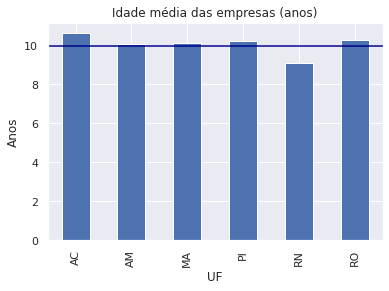

In [ ]:
# Idade média das empresas em anos

ax = df_market.groupby('sg_uf')['idade_empresa_anos'].mean().plot(kind='bar', title='Idade média das empresas (anos)')
plt.axhline(df_market['idade_empresa_anos'].mean(), color='darkblue')
ax.set_xlabel('UF')
ax.set_ylabel('Anos')

Text(0.5, 1.0, 'Idade média das empresas por setor')

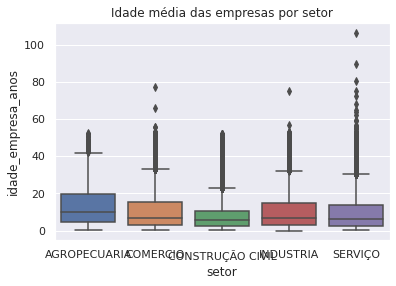

In [ ]:
# Idade média das empresas por setor

sns.boxplot(x='setor', y='idade_empresa_anos', data=df_market)
plt.title('Idade média das empresas por setor')

In [ ]:
# Empresas por faixa de faturamento

df_market.groupby('de_faixa_faturamento_estimado')['fl_matriz'].count().sort_values()

de_faixa_faturamento_estimado
ACIMA DE 1 BILHAO DE REAIS                      21
DE R$ 500.000.000,01 A 1 BILHAO DE REAIS        27
DE R$ 300.000.000,01 A R$ 500.000.000,00        48
DE R$ 100.000.000,01 A R$ 300.000.000,00       253
DE R$ 30.000.000,01 A R$ 100.000.000,00        871
SEM INFORMACAO                                1173
DE R$ 10.000.000,01 A R$ 30.000.000,00        1445
DE R$ 4.800.000,01 A R$ 10.000.000,00         2150
DE R$ 1.500.000,01 A R$ 4.800.000,00         10153
DE R$ 360.000,01 A R$ 1.500.000,00           46225
ATE R$ 81.000,00                             98558
DE R$ 81.000,01 A R$ 360.000,00             273861
Name: fl_matriz, dtype: int64

Text(0.5, 1.0, 'Relação entre faturamento e quadro de empregados')

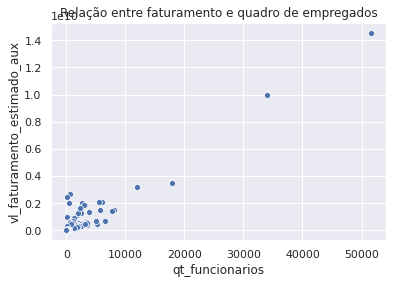

In [ ]:
# Relação entre faturamento e quadro de empregados

sns.scatterplot(x='qt_funcionarios', y='vl_faturamento_estimado_aux', data=df_market)
ax.set_ylabel('Funcionários')
ax.set_ylabel('Faturamento estimado (R$)')
plt.title('Relação entre faturamento e quadro de empregados')

# Tabelas de contingência

## Dados regionais

In [ ]:
# UF e setor
pd.crosstab(df_market['setor'], df_market['sg_uf'], normalize='index').round(4)*100

sg_uf,AC,AM,MA,PI,RN,RO
setor,,,,,,
AGROPECUARIA,4.59,11.92,32.28,18.08,22.08,11.06
COMERCIO,4.69,17.27,29.98,16.80,19.44,11.83
CONSTRUÇÃO CIVIL,4.45,19.38,24.52,13.57,25.50,12.58
INDUSTRIA,4.47,15.98,22.35,16.99,25.62,14.59
SERVIÇO,4.15,18.45,26.17,16.68,22.40,12.15


In [ ]:
# UF e natureza jurídica
pd.crosstab(df_market['natureza_juridica_macro'], df_market['sg_uf'], normalize='index').round(4)*100

sg_uf,AC,AM,MA,PI,RN,RO
natureza_juridica_macro,,,,,,
ADMINISTRACAO PUBLICA,5.53,13.22,26.82,25.93,19.33,9.17
CARGO POLITICO,14.97,22.70,21.83,11.01,13.05,16.45
ENTIDADES EMPRESARIAIS,3.95,17.73,26.36,14.84,20.92,16.20
ENTIDADES SEM FINS LUCRATIVOS,4.43,13.92,34.44,19.32,17.14,10.75
INSTITUICOES EXTRATERRITORIAIS,0.00,100.00,0.00,0.00,0.00,0.00
OUTROS,4.54,18.25,27.27,16.64,22.14,11.15
PESSOAS FISICAS,3.18,12.90,20.82,46.53,3.02,13.55


In [ ]:
# UF e saúde tributária
pd.crosstab(df_market['de_saude_tributaria'], df_market['sg_uf'], normalize='index').round(4)*100

sg_uf,AC,AM,MA,PI,RN,RO
de_saude_tributaria,,,,,,
AMARELO,5.34,20.43,32.88,14.80,17.26,9.28
AZUL,4.26,16.63,29.28,17.29,20.02,12.51
CINZA,3.98,19.10,24.53,16.03,23.83,12.54
LARANJA,4.32,16.63,28.64,16.18,20.33,13.89
VERDE,4.18,16.45,24.55,17.63,23.99,13.20
VERMELHO,5.26,17.80,24.75,16.73,24.49,10.97


In [ ]:
# UF e segmento
pd.crosstab([df_market['setor'], df_market['nm_segmento']], df_market['sg_uf'], normalize='index').round(4)*100

sg_uf                                                                   AC  \
setor            nm_segmento                                                 
AGROPECUARIA     AGRICULTURA PECUARIA PRODUCAO FLORESTAL PESCA E...   4.59   
COMERCIO         COMERCIO; REPARACAO DE VEICULOS AUTOMOTORES E M...   4.69   
CONSTRUÇÃO CIVIL CONSTRUCAO                                           4.45   
INDUSTRIA        ELETRICIDADE E GAS                                   3.46   
                 INDUSTRIAS DE TRANSFORMACAO                          4.53   
                 INDUSTRIAS EXTRATIVAS                                3.12   
SERVIÇO          ADMINISTRACAO PUBLICA DEFESA E SEGURIDADE SOCIAL     4.47   
                 AGUA ESGOTO ATIVIDADES DE GESTAO DE RESIDUOS E ...   3.31   
                 ALOJAMENTO E ALIMENTACAO                             5.49   
                 ARTES CULTURA ESPORTE E RECREACAO                    4.45   
                 ATIVIDADES ADMINISTRATIVAS E SERVICOS COMPLEMEN...   3.35   
                 ATIVIDADES FINANCEIRAS DE SEGUROS E SERVICOS RE...   3.77   
                 ATIVIDADES IMOBILIARIAS                              2.43   
                 ATIVIDADES PROFISSIONAIS CIENTIFICAS E TECNICAS      4.15   
                 EDUCACAO                                             4.45   
                 INDUSTRIAS DE TRANSFORMACAO                          3.37   
                 INFORMACAO E COMUNICACAO                             3.82   
                 ORGANISMOS INTERNACIONAIS E OUTRAS INSTITUICOES...  22.22   
                 OUTRAS ATIVIDADES DE SERVICOS                        4.20   
                 SAUDE HUMANA E SERVICOS SOCIAIS                      3.51   
                 SERVICOS DOMESTICOS                                  1.72   
                 TRANSPORTE ARMAZENAGEM E CORREIO                     3.27   

sg_uf                                                                   AM  \
setor            nm_segmento                                                 
AGROPECUARIA     AGRICULTURA PECUARIA PRODUCAO FLORESTAL PESCA E...  11.92   
COMERCIO         COMERCIO; REPARACAO DE VEICULOS AUTOMOTORES E M...  17.27   
CONSTRUÇÃO CIVIL CONSTRUCAO                                          19.38   
INDUSTRIA        ELETRICIDADE E GAS                                  19.93   
                 INDUSTRIAS DE TRANSFORMACAO                         16.10   
                 INDUSTRIAS EXTRATIVAS                                9.38   
SERVIÇO          ADMINISTRACAO PUBLICA DEFESA E SEGURIDADE SOCIAL    11.55   
                 AGUA ESGOTO ATIVIDADES DE GESTAO DE RESIDUOS E ...  16.07   
                 ALOJAMENTO E ALIMENTACAO                            18.80   
                 ARTES CULTURA ESPORTE E RECREACAO                   16.30   
                 ATIVIDADES ADMINISTRATIVAS E SERVICOS COMPLEMEN...  22.26   
                 ATIVIDADES FINANCEIRAS DE SEGUROS E SERVICOS RE...  16.03   
                 ATIVIDADES IMOBILIARIAS                             13.52   
                 ATIVIDADES PROFISSIONAIS CIENTIFICAS E TECNICAS     21.18   
                 EDUCACAO                                            15.58   
                 INDUSTRIAS DE TRANSFORMACAO                         27.62   
                 INFORMACAO E COMUNICACAO                            22.59   
                 ORGANISMOS INTERNACIONAIS E OUTRAS INSTITUICOES...  33.33   
                 OUTRAS ATIVIDADES DE SERVICOS                       15.06   
                 SAUDE HUMANA E SERVICOS SOCIAIS                     17.24   
                 SERVICOS DOMESTICOS                                  8.06   
                 TRANSPORTE ARMAZENAGEM E CORREIO                    26.47   

sg_uf                                                                   MA  \
setor            nm_segmento                                                 
AGROPECUARIA     AGRICULTURA PECUARIA PRODUCAO FLORESTAL PESCA E...  32.28   
COMERCIO         COM

In [ ]:
# Faturamento por mesorregiões, em milhares de R$
pd.DataFrame(df_market.groupby(['sg_uf','nm_meso_regiao'])['vl_faturamento_estimado_aux'].mean().dropna()/1000)

vl_faturamento_estimado_aux
sg_uf nm_meso_regiao                                     
AC    VALE DO ACRE                             945.830900
      VALE DO JURUA                            508.566331
AM    CENTRO AMAZONENSE                       1238.496245
      NORTE AMAZONENSE                         346.067615
      SUDOESTE AMAZONENSE                      541.837201
      SUL AMAZONENSE                           329.266690
MA    CENTRO MARANHENSE                        462.159951
      LESTE MARANHENSE                         517.512481
      NORTE MARANHENSE                         994.955791
      OESTE MARANHENSE                         563.262177
      SUL MARANHENSE                           676.837439
PI    CENTRO NORTE PIAUIENSE                   842.881991
      NORTE PIAUIENSE                          410.519709
      SUDESTE PIAUIENSE                        483.675417
      SUDOESTE PIAUIENSE                       436.279386
RN    AGRESTE POTIGUAR                         516.004423
      CENTRAL POTIGUAR                         461.260852
      LESTE POTIGUAR                           896.517574
      OESTE POTIGUAR                           625.195330

In [ ]:
# Faturamento por meso e microrregiões, em milhares de R$
pd.DataFrame(df_market.groupby(['sg_uf','nm_meso_regiao','nm_micro_regiao'])['vl_faturamento_estimado_aux'].mean().dropna()/1000)

vl_faturamento_estimado_aux
sg_uf nm_meso_regiao         nm_micro_regiao                                               
AC    VALE DO ACRE           BRASILEIA                                           484.802367
                             RIO BRANCO                                         1023.335079
                             SENA MADUREIRA                                      534.864532
      VALE DO JURUA          CRUZEIRO DO SUL                                     525.252896
                             TARAUACA                                            469.477785
AM    CENTRO AMAZONENSE      COARI                                               623.380180
                             ITACOATIARA                                         590.434046
                             MANAUS                                             1382.103312
                             PARINTINS                                           364.018769
                             RIO PRETO DA EVA                                    560.598793
                             TEFE                                                528.451852
      NORTE AMAZONENSE       JAPURA                                              215.224287
                             RIO NEGRO                                           364.572744
      SUDOESTE AMAZONENSE    ALTO SOLIMOES                                       569.286468
                             JURUA                                               492.666271
      SUL AMAZONENSE         BOCA DO ACRE                                        358.603318
                             MADEIRA                                             248.725738
                             PURUS                                               634.270921
MA    CENTRO MARANHENSE      ALTO MEARIM E GRAJAU                                505.758395
                             MEDIO MEARIM                                        473.496210
                             PRESIDENTE DUTRA                                    367.752930
      LESTE MARANHENSE       BAIXO PARNAIBA MARANHENSE                           285.300215
                             CAXIAS                                              520.280257
                             CHAPADAS DO ALTO ITAPECURU                          417.085481
                             CHAPADINHA                                          429.217026
                             CODO                                                619.794267
                             COELHO NETO                                        1030.956155
      NORTE MARANHENSE       AGLOMERACAO URBANA DE SAO LUIS                     1183.749772
                             BAIXADA MARANHENSE                                  358.895329
                             ITAPECURU MIRIM                                     538.413081
                             LENCOIS MARANHENSES                                 465.360263
                             LITORAL OCIDENTAL MARANHENSE                        498.273693
                             ROSARIO                                             514.125385
      OESTE MARANHENSE       GURUPI                                              559.962768
                             IMPERATRIZ                                          600.979140
                             PINDARE                                             492.002070
      SUL MARANHENSE         CHAPADAS DAS MANGABEIRAS                            765.677888
                             GERAIS DE BALSAS                                    763.280847
                             PORTO FRANCO                                        520.938769
PI    CENTRO NORTE PIAUIENSE CAMPO MAIOR                                         497.334819
                             MEDIO PARNAIBA PIAUIENSE                            423.141476
                             TERESINA                                            937.670168
                

## Perfil societário

In [ ]:
# Quantidade média dos sócios, por setor e natureza jurídica
pd.crosstab(index=df_market['de_natureza_juridica'],
            columns=df_market['setor'],
            values=df_market['qt_socios'], aggfunc=np.mean).round(1)

setor,AGROPECUARIA,COMERCIO,CONSTRUÇÃO CIVIL,INDUSTRIA,SERVIÇO
de_natureza_juridica,,,,,
ASSOCIACAO PRIVADA,1.3,1.8,1.0,1.6,1.1
CONSORCIO DE SOCIEDADES,NaN,4.0,3.3,3.6,3.6
COOPERATIVA,3.2,3.2,3.9,3.4,3.2
EMPRESA INDIVIDUAL DE RESPONSABILIDADE LIMITADA DE NATUREZA EMPRESARIA,1.1,1.0,1.0,1.0,1.0
EMPRESA INDIVIDUAL DE RESPONSABILIDADE LIMITADA DE NATUREZA SIMPLES,NaN,1.0,1.0,NaN,1.0
EMPRESA PUBLICA,NaN,4.4,2.0,NaN,7.6
EMPRESARIO INDIVIDUAL,1.0,1.0,1.0,1.0,1.0
ESTABELECIMENTO NO BRASIL DE SOCIEDADE ESTRANGEIRA,NaN,NaN,1.0,NaN,1.0
FUNDACAO PRIVADA,1.0,NaN,NaN,1.0,2.1


In [ ]:
# Idade média dos sócios, por setor e natureza jurídica
pd.crosstab(index=df_market['de_natureza_juridica'],
            columns=df_market['setor'],
            values=df_market['idade_media_socios'], aggfunc=np.mean).round(1)

setor,AGROPECUARIA,COMERCIO,CONSTRUÇÃO CIVIL,INDUSTRIA,SERVIÇO
de_natureza_juridica,,,,,
ASSOCIACAO PRIVADA,48.7,52.2,55.2,51.2,51.3
CONSORCIO DE SOCIEDADES,NaN,63.0,56.0,63.0,48.1
COOPERATIVA,51.4,52.5,51.0,51.2,50.8
EMPRESA INDIVIDUAL DE RESPONSABILIDADE LIMITADA DE NATUREZA EMPRESARIA,46.2,39.9,40.0,42.1,40.1
EMPRESA INDIVIDUAL DE RESPONSABILIDADE LIMITADA DE NATUREZA SIMPLES,NaN,36.5,41.0,NaN,46.1
EMPRESA PUBLICA,NaN,55.4,52.5,NaN,52.2
EMPRESARIO INDIVIDUAL,43.9,40.4,40.4,42.4,39.4
ESTABELECIMENTO NO BRASIL DE SOCIEDADE ESTRANGEIRA,NaN,NaN,47.0,NaN,67.0
FUNDACAO PRIVADA,39.0,NaN,NaN,49.0,54.9


## Faturamento

In [ ]:
# Distribuição de faixas de faturamento, por UF
pd.crosstab(df_market['de_faixa_faturamento_estimado'], df_market['sg_uf'], normalize='index').round(5)*100

sg_uf,AC,AM,MA,PI,RN,RO
de_faixa_faturamento_estimado,,,,,,
ACIMA DE 1 BILHAO DE REAIS,4.762,38.095,23.810,14.286,14.286,4.762
"ATE R$ 81.000,00",4.125,14.932,25.164,17.539,26.529,11.711
"DE R$ 1.500.000,01 A R$ 4.800.000,00",4.629,18.871,22.624,15.385,21.117,17.374
"DE R$ 10.000.000,01 A R$ 30.000.000,00",5.467,24.706,21.038,16.263,17.578,14.948
"DE R$ 100.000.000,01 A R$ 300.000.000,00",4.743,30.830,28.063,11.858,17.787,6.719
"DE R$ 30.000.000,01 A R$ 100.000.000,00",5.741,25.488,21.010,15.959,20.436,11.366
"DE R$ 300.000.000,01 A R$ 500.000.000,00",14.583,41.667,27.083,6.250,4.167,6.250
"DE R$ 360.000,01 A R$ 1.500.000,00",4.074,16.513,25.958,17.428,21.408,14.620
"DE R$ 4.800.000,01 A R$ 10.000.000,00",5.209,23.349,21.581,14.372,17.907,17.581
